In [2]:
import numpy as np, pandas
from matplotlib import pyplot as plt
from astropy.io import fits
from pyia import GaiaData
from astropy.table import Table
%matplotlib inline

## Loading in some data, merging into unified pandas data frame

In [3]:
#Name of Kinematic data file, and file with matched photometry. Have confirmed that 
#source id's once sorted are identical
kine_file = 'data/GaiaDR2_vrad_vel.fits'
phot_file = 'data/GaiaDR2_vrad_vel_phot.fits'

In [4]:
#Query to access stars with 6D kinematics is
"""SELECT source_id, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, astrometric_excess_noise, astrometric_excess_noise_sig
    FROM gaiadr2.gaia_source as gdr2
    WHERE rv_nb_transits > 0 AND
          astrometric_params_solved = 31"""

'SELECT source_id, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, astrometric_excess_noise, astrometric_excess_noise_sig\n    FROM gaiadr2.gaia_source as gdr2\n    WHERE rv_nb_transits > 0 AND\n          astrometric_params_solved = 31'

In [5]:
#read fits tables into pandas dataframes, problem with Kinematic file for... reasons?
#Having to do with big-endianess? this foe is beyond any of me. run.
with fits.open(kine_file) as kf:
    k_df = pandas.DataFrame(np.array(kf[1].data).byteswap().newbyteorder())

In [6]:
with fits.open(phot_file) as pf:
    p_df = pandas.DataFrame(np.array(pf[1].data).byteswap().newbyteorder())

In [7]:
merge_df = k_df.merge(p_df,on='source_id')

# Select stars within 1 kpc, plot in CMD space

In [8]:
nearby = merge_df['dist'] <= 1000.0

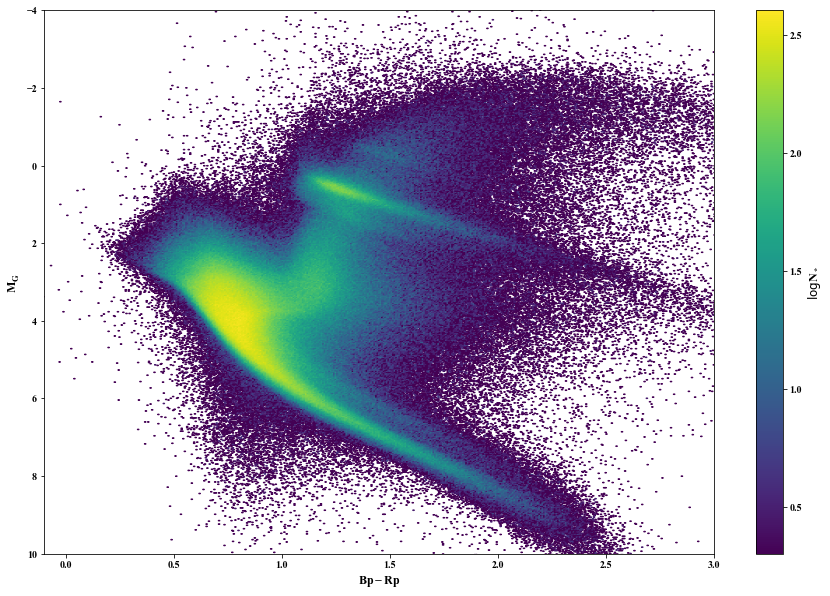

In [9]:
plt.figure(figsize=(15,10))
plt.hexbin(merge_df['phot_bp_mean_mag'][nearby]-merge_df['phot_rp_mean_mag'][nearby],
          merge_df['phot_g_mean_mag'][nearby] - 5.0*np.log10(merge_df['dist'][nearby]) + 5.0,
          mincnt = 1, bins = 'log', gridsize = 1000)
plt.xlabel(r'$Bp - Rp$')
plt.ylabel(r'$M_G$')
plt.xlim(-0.1,3)
plt.ylim(10,-4)
plt.colorbar(label=r'$\log N_*$')
plt.savefig('CMD_kinematics_1kpc.png')

## Let's look at the astrometric excess noise (sigma) in each bin of this plot

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


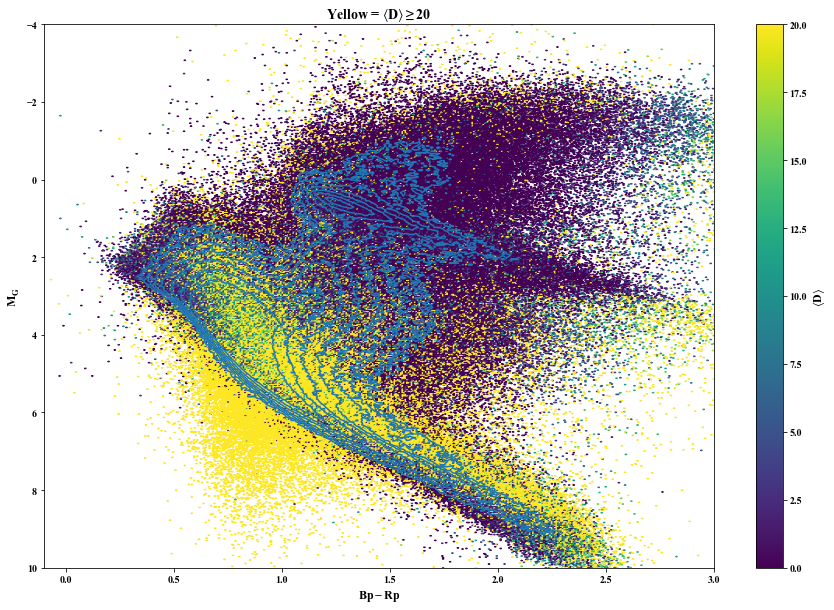

In [10]:
plt.figure(figsize=(15,10))
xdat = merge_df['phot_bp_mean_mag'][nearby]-merge_df['phot_rp_mean_mag'][nearby]
ydat = merge_df['phot_g_mean_mag'][nearby] - 5.0*np.log10(merge_df['dist'][nearby]) + 5.0
C = merge_df['astrometric_excess_noise_sig'][nearby]
plt.hexbin(xdat, ydat, C=C, gridsize=1000, vmax=20)
plt.colorbar(label=r'$\langle D \rangle$')

H,xedges,yedges = np.histogram2d(xdat[~(np.isnan(xdat)|np.isnan(ydat))],
                                 ydat[~(np.isnan(xdat)|np.isnan(ydat))],
                                 bins=(500,500))
plt.contour(xedges[:-1]+np.abs(np.diff(xedges)[0])/2,
            yedges[:-1]+np.abs(np.diff(yedges)[0])/2,
            np.log10(H.T),levels=(1.25,1.5,1.75,2,2.25,2.5,2.75),colors='C0')
plt.xlim(-0.1,3)
plt.ylim(10,-4)
plt.xlabel(r'$Bp - Rp$')
plt.ylabel(r'$M_G$')
plt.title(r'Yellow = $\langle D \rangle \geq 20$')
plt.savefig('CMD_1kpc_astrometric_sigma_cont.png')

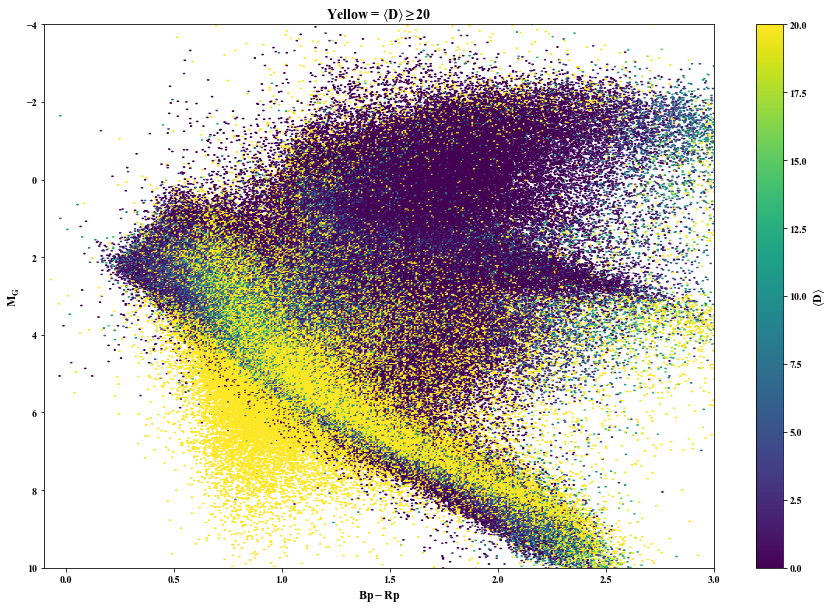

In [11]:
plt.figure(figsize=(15,10))
xdat = merge_df['phot_bp_mean_mag'][nearby]-merge_df['phot_rp_mean_mag'][nearby]
ydat = merge_df['phot_g_mean_mag'][nearby] - 5.0*np.log10(merge_df['dist'][nearby]) + 5.0
C = merge_df['astrometric_excess_noise_sig'][nearby]
plt.hexbin(xdat, ydat, C=C, gridsize=1000, vmax=20)
plt.colorbar(label=r'$\langle D \rangle$')
plt.xlim(-0.1,3)
plt.ylim(10,-4)

plt.xlabel(r'$Bp - Rp$')
plt.ylabel(r'$M_G$')
plt.title(r'Yellow = $\langle D \rangle \geq 20$')
plt.savefig('CMD_1kpc_astrometric_sigma.png')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


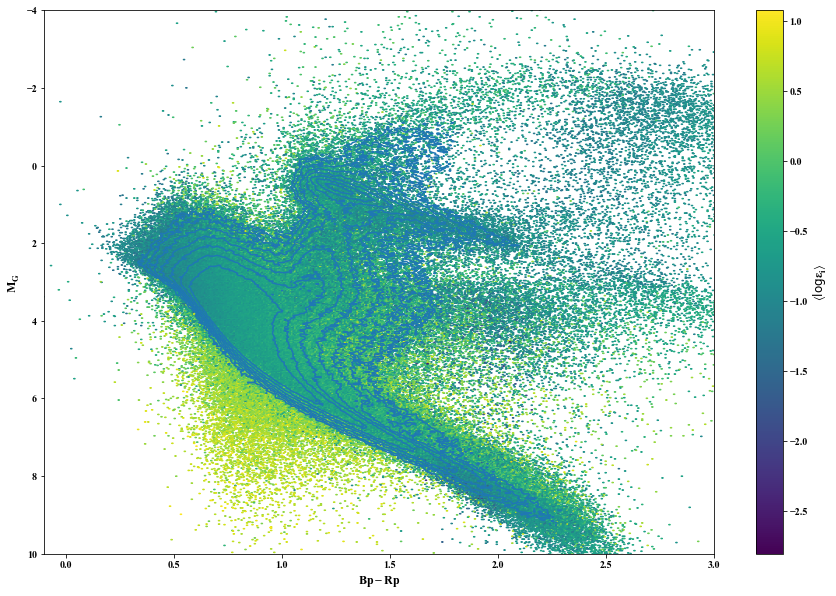

In [12]:
plt.figure(figsize=(15,10))
xdat = merge_df['phot_bp_mean_mag'][nearby]-merge_df['phot_rp_mean_mag'][nearby]
ydat = merge_df['phot_g_mean_mag'][nearby] - 5.0*np.log10(merge_df['dist'][nearby]) + 5.0
C = np.log10(merge_df['astrometric_excess_noise'][nearby])
plt.hexbin(xdat, ydat, C=C, gridsize=1000)
plt.colorbar(label=r'$\langle \log\epsilon_i \rangle$')

H,xedges,yedges = np.histogram2d(xdat[~(np.isnan(xdat)|np.isnan(ydat))],
                                 ydat[~(np.isnan(xdat)|np.isnan(ydat))],
                                 bins=(500,500))
plt.contour(xedges[:-1]+np.abs(np.diff(xedges)[0])/2,
            yedges[:-1]+np.abs(np.diff(yedges)[0])/2,
            np.log10(H.T),levels=(1.25,1.5,1.75,2,2.25,2.5,2.75),colors='C0')
plt.xlim(-0.1,3)
plt.ylim(10,-4)
plt.xlabel(r'$Bp - Rp$')
plt.ylabel(r'$M_G$')
plt.savefig('CMD_1kpc_astrometric_excess_cont.png')

## What's up with this astrometric excess noise sig thing? Is there anything there?

(0, 20)

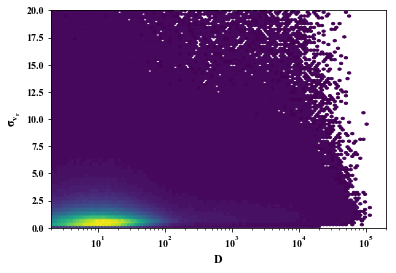

In [13]:
sig_pos = merge_df['astrometric_excess_noise_sig'] > 2
plt.hexbin(merge_df['astrometric_excess_noise_sig'][sig_pos],np.abs(merge_df['e_vrad'][sig_pos]),
          mincnt=1,bins=50,xscale='log')
plt.xlabel('$D$')
plt.ylabel(r'$\sigma_{v_r}$')
plt.xlim(2,2e5)
plt.ylim(0,20)

(0, 15)

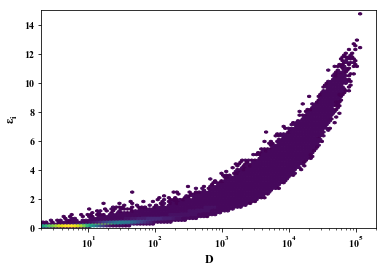

In [14]:
plt.hexbin(merge_df['astrometric_excess_noise_sig'][sig_pos],merge_df['astrometric_excess_noise'][sig_pos],
          mincnt=1,bins=50,xscale='log')
plt.xlabel('$D$')
plt.ylabel(r'$\epsilon_i$')
plt.xlim(2,2e5)
plt.ylim(0,15)

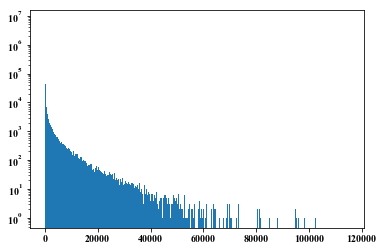

In [15]:
plt.hist(merge_df['astrometric_excess_noise_sig'],bins=1000,log=True);

## Let's try making a cut on $\sigma_{v_r}$, and saying everything above is a binary

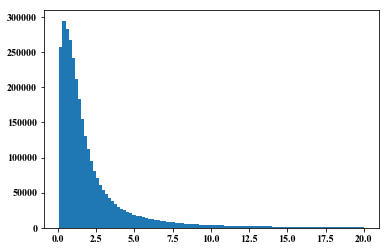

In [16]:
plt.hist(merge_df['e_vrad'][nearby],bins=100); #5 is a good cut?

In [17]:
binar_cut = merge_df[(merge_df['e_vrad'] >= 5)&nearby]

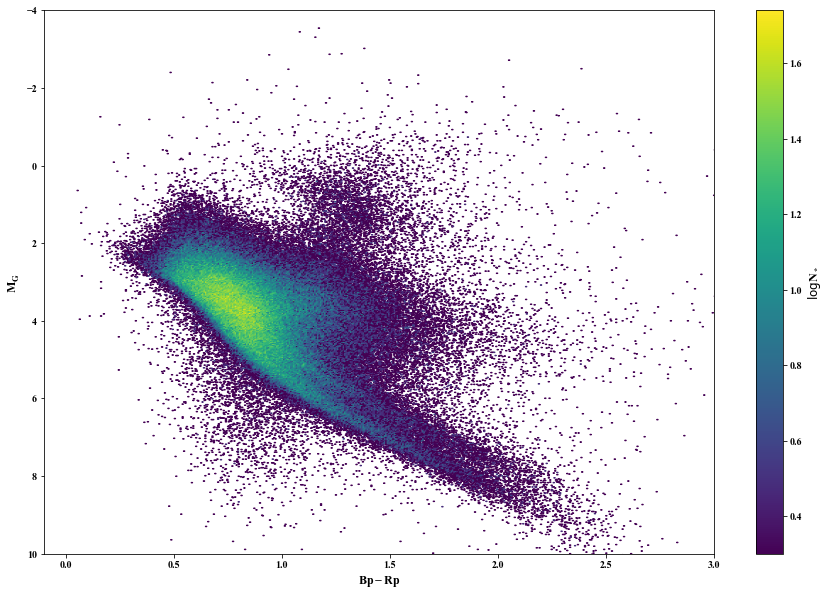

In [18]:
plt.figure(figsize=(15,10))
plt.hexbin(binar_cut['phot_bp_mean_mag']-binar_cut['phot_rp_mean_mag'],
          binar_cut['phot_g_mean_mag'] - 5.0*np.log10(binar_cut['dist']) + 5.0,
          mincnt = 1, bins = 'log', gridsize = 1000)
plt.xlabel(r'$Bp - Rp$')
plt.ylabel(r'$M_G$')
plt.xlim(-0.1,3)
plt.ylim(10,-4)
plt.colorbar(label=r'$\log N_*$')
plt.savefig('CMD_kinematics_1kpc_bin.png')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


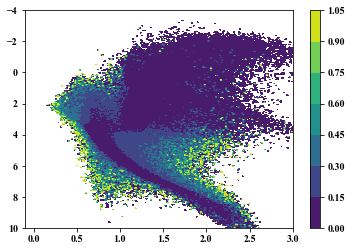

In [19]:
xdat1 = binar_cut['phot_bp_mean_mag']-binar_cut['phot_rp_mean_mag']
ydat1 = binar_cut['phot_g_mean_mag'] - 5.0*np.log10(binar_cut['dist']) + 5.0

xdat2 = merge_df['phot_bp_mean_mag'][nearby]-merge_df['phot_rp_mean_mag'][nearby]
ydat2 = merge_df['phot_g_mean_mag'][nearby] - 5.0*np.log10(merge_df['dist'][nearby]) + 5.0


H2,xedges2,yedges2 = np.histogram2d(xdat2[~(np.isnan(xdat2)|np.isnan(ydat2))],
                                 ydat2[~(np.isnan(xdat2)|np.isnan(ydat2))],
                                 bins=(500,500))

H1,xedges1,yedges1 = np.histogram2d(xdat1[~(np.isnan(xdat1)|np.isnan(ydat1))],
                                 ydat1[~(np.isnan(xdat1)|np.isnan(ydat1))],
                                 bins=(xedges2,yedges2))

plt.contourf(xedges1[:-1]+np.abs(np.diff(xedges1)[0])/2,
            yedges1[:-1]+np.abs(np.diff(yedges1)[0])/2,
            H1.T/H2.T)

plt.xlim(-0.1,3)
plt.ylim(10,-4)
plt.colorbar()
plt.savefig('rough_binary_fraction_CMD.png')

## Let's take a look at some O stars we found with RVs...

In [20]:
o_sid = [4153666106124493696, 4157061363634092160, 4203391652582474752,
        2062426085622944256, 2061213083772814080, 2067784624247057920,
        2070636448174993024, 1970299999201029888, 2010239999586617216,
        2207167239400168192,  429927879906030336,  506790923870949248,
        465646064885637504,  466127062559750528,  190835189486719616,
        5528383187882877312, 5525970966757975808, 5523764178195480448,
        5522306019626566528, 5328579939188867200, 5338453278772130688,
        5866651998931097472, 5940106213259136000, 6018555337108830080,
        5966563486675142912, 5976382915813535232, 5975286256001980416,
        4108133336765685376]

In [21]:
o_df = pandas.DataFrame()
for sid in o_sid:
    o_df.append(merge_df[merge_df['source_id'] == sid])

In [25]:
for sid in o_sid:
    init = sid in merge_df['source_id']
    print(sid in merge_df['source_id'])
    if init:
        print(sid)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
